# Non-linear dimension reduction

## Importing Data and Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df_kpca = pd.read_csv("DataKPCA.csv")

## Visualizing the Data

In [19]:
display(df_kpca)
df_kpca.info(verbose=True)

,x1,x2,x3,x4,x5,x6,x7
0,2.596641,15.263178,-46.289607,-10.993265,-2.266729,1.935832,2.039688
1,3.096286,14.784802,-48.175614,-8.799362,-2.220871,1.851201,1.921974
2,3.360246,14.774917,-49.471841,-9.030501,-1.760447,1.753114,2.041933
3,2.214819,15.027394,-43.200400,-13.565001,-2.643018,2.200463,2.141847
4,3.398576,15.115756,-49.416644,-6.857672,-2.025936,1.788085,1.875540
...,...,...,...,...,...,...,...
185,2.647090,14.246231,-44.947807,-10.412540,-2.809695,2.084152,1.903990
186,2.677908,14.620351,-45.776334,-10.196029,-2.640178,2.038005,1.910832
187,3.543866,14.487241,-49.692284,-7.773038,-1.865513,1.752195,1.952922
188,3.563404,13.945495,-49.131439,-8.156546,-2.104684,1.773425,1.914397


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      190 non-null    float64
 3   x4      190 non-null    float64
 4   x5      190 non-null    float64
 5   x6      190 non-null    float64
 6   x7      190 non-null    float64
dtypes: float64(7)
memory usage: 10.5 KB


All the data types are float64 and they are all no null values

In [20]:
def dispEntryInfo(df): #Function which displays Data type, number of unique entries, number of null entries of each column in a Pandas DataFrame df
    for col in df.columns.values: # For each column
        unique_vals = pd.unique(df[col]) # Creating list of unique values
        print(f"{col}:\t {len(unique_vals)} unique entries.") # Printing data regarding the column: Data type, number of unique values and number of null entries
        if len(unique_vals) <= 10: #If there are <= 10 unique values
            print(f"\tThese are: {unique_vals}\n")

In [21]:
dispEntryInfo(df_kpca)

x1:	 190 unique entries.
x2:	 190 unique entries.
x3:	 190 unique entries.
x4:	 190 unique entries.
x5:	 190 unique entries.
x6:	 190 unique entries.
x7:	 190 unique entries.


All the values are unique

### Histograms and Scatterplots

In [22]:
def plotAllHist(df):
    for col in df.columns.values: # For each column in dataset
        print(df[col].dtypes)
        plt.hist(df[col])
        plt.xlabel(col)
        plt.show()

In [23]:
def plotPairWiseScatter(df_clust):
    for j in range(len(df_clust.columns)):
        for i in range(j+1, len(df_clust.columns)):
            plt.scatter(df_clust[df_clust.columns[j]], df_clust[df_clust.columns[i]])
            plt.xlabel(df_clust.columns[j])
            plt.ylabel(df_clust.columns[i])
            plt.show()

float64


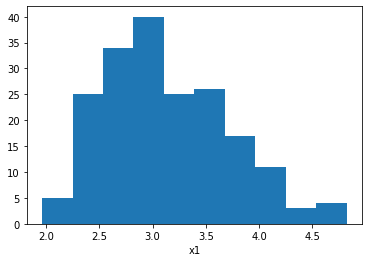

float64


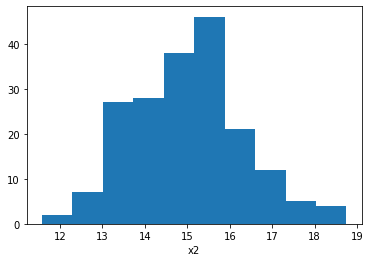

float64


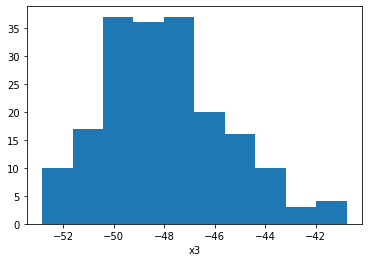

float64


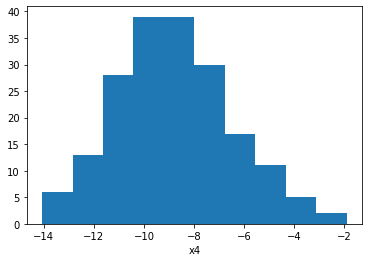

float64


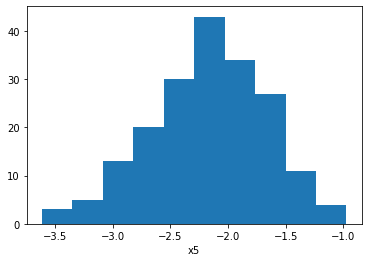

float64


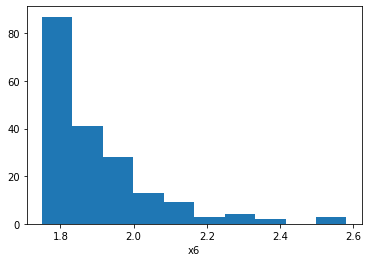

float64


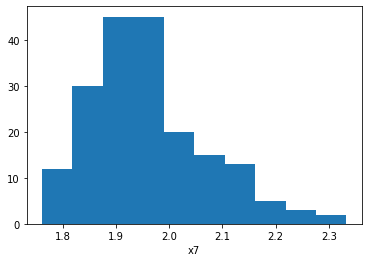

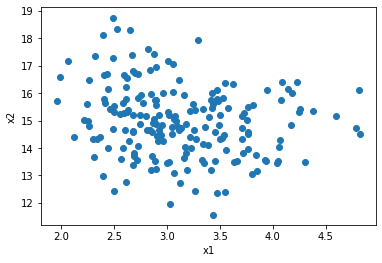

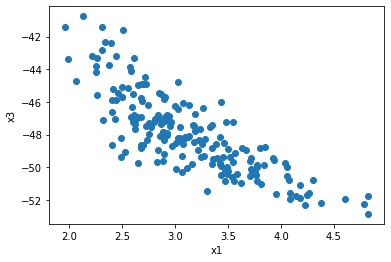

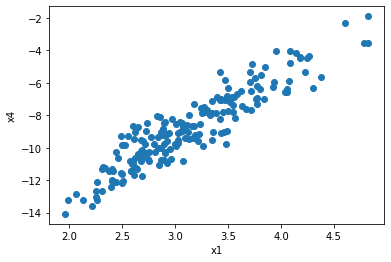

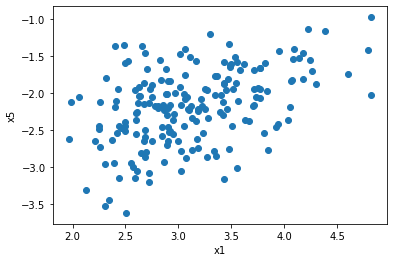

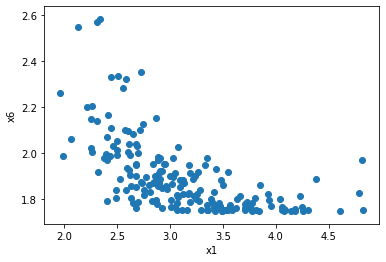

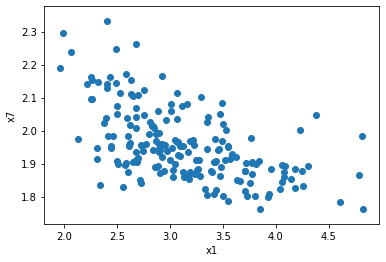

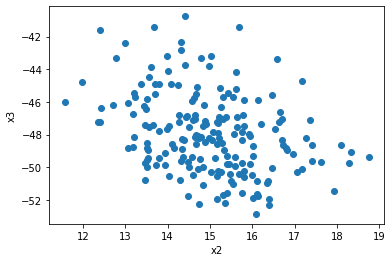

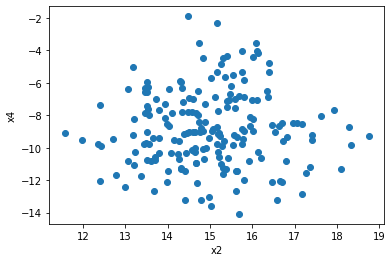

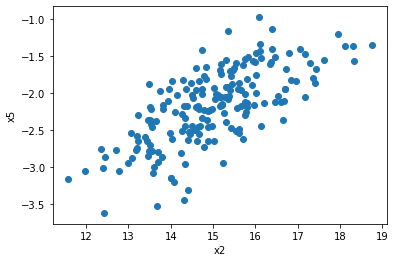

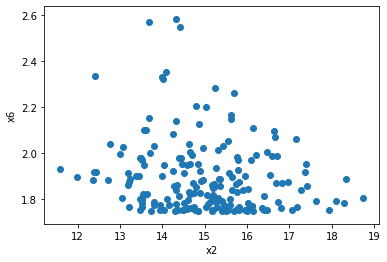

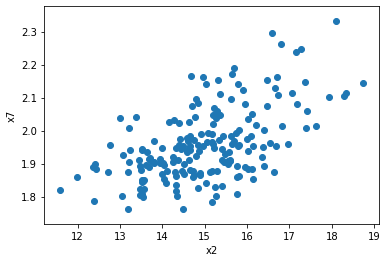

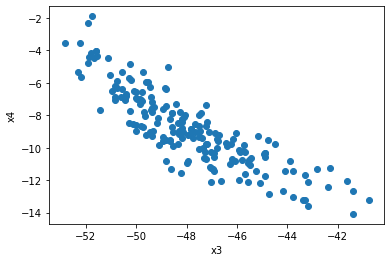

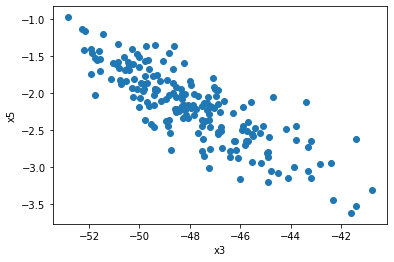

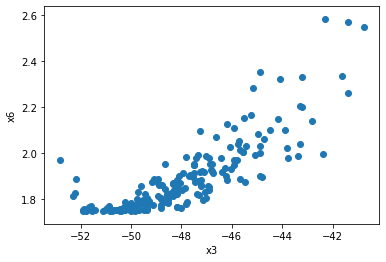

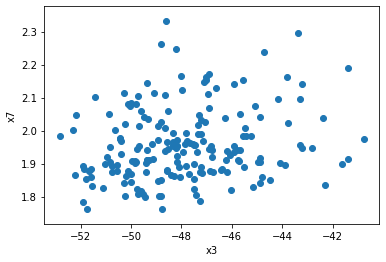

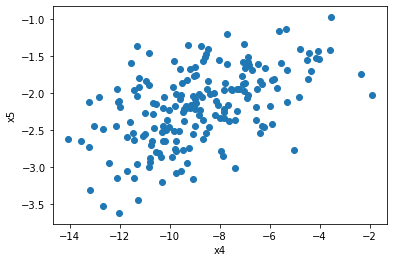

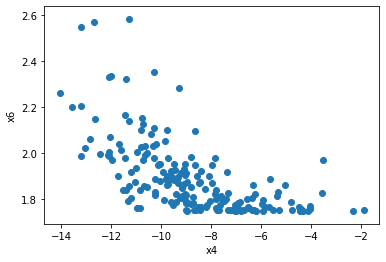

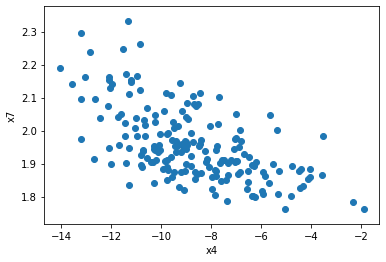

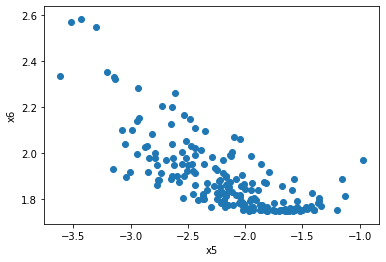

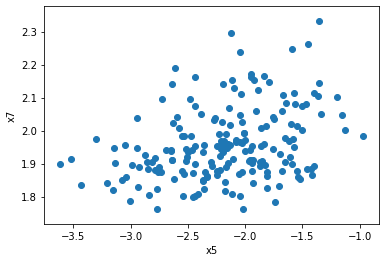

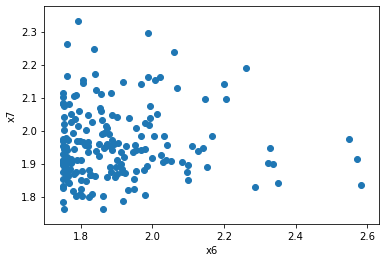

In [24]:
plotAllHist(df_kpca)
plotPairWiseScatter(df_kpca)

Histograms are centralized and well scattered data

## Training KPCA

In [25]:
from sklearn.decomposition import KernelPCA as KPCA

kpca = KPCA()
df_red_kpca = kpca.fit_transform(df_kpca)

display(df_red_kpca)

array([[ 2.67952520e+00,  7.32487950e-01, -1.86053729e-01, ...,
        -3.58792614e-02,  8.36350408e-03, -1.16431014e-02],
       [-1.73772176e-01, -1.08641771e-01, -2.42899268e-01, ...,
        -2.25978336e-02, -7.33685206e-03, -1.31335871e-02],
       [-1.04066819e+00,  3.84269051e-01, -1.24599355e+00, ...,
        -1.01086623e-02, -3.51437320e-02,  1.02643192e-04],
       ...,
       [-2.02721154e+00, -3.52191878e-01, -7.48911266e-01, ...,
        -5.04459764e-02, -3.63336234e-02, -7.16214178e-03],
       [-1.29908939e+00, -8.58734782e-01, -8.91573709e-01, ...,
         1.76867913e-02,  2.50570718e-03, -2.42091056e-02],
       [-1.83824156e+00, -1.12783385e+00, -8.29449747e-01, ...,
         6.91435959e-02,  2.77162059e-02, -7.94981066e-03]])

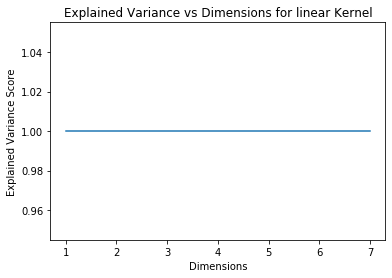

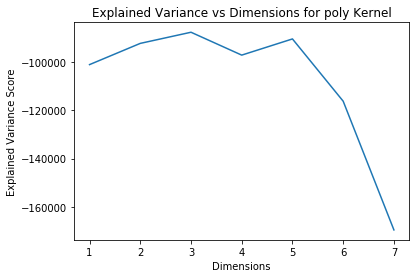

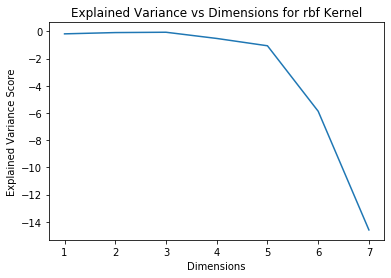

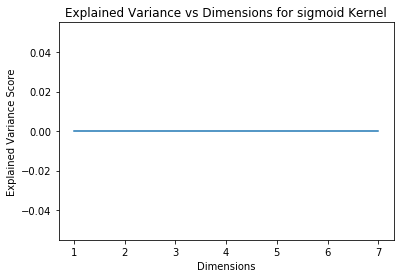

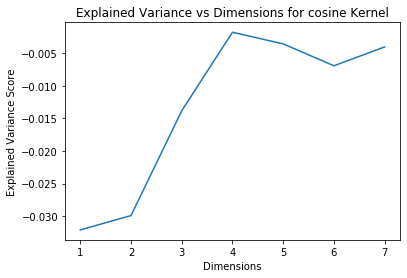

In [26]:
from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score as exp_var

n_comp_range = np.arange(1, 8)

kernel_list = ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']

for kernel in kernel_list:
    scores = []
    for n_comp in n_comp_range:
        pca = PCA(n_components=n_comp)
        kpca = KPCA(n_components=n_comp,kernel=kernel)
        df_red_kpca = kpca.fit_transform(df_kpca)
        df_red_pca = pca.fit_transform(df_kpca)
        scores.append(exp_var(df_red_pca,df_red_kpca))

    plt.plot(n_comp_range, scores)
    plt.title(f"Explained Variance vs Dimensions for {kernel} Kernel")
    plt.xlabel("Dimensions")
    plt.ylabel("Explained Variance Score")
    plt.show()

Here, we have used PCA to be the 'ground truth' in order to calculate explained variance scores. We see that cosine kernel seems to work well for higher dimensions and rbf kernel for lower dimensions.

In [27]:
print(np.hstack((np.array(['mfcc_{}_{}'.format(i,j) for j in ['mean','median'] for i in range(13)]), np.array(['mfcc_{}_median'.format(i) for i in range(13)]))))

['mfcc_0_mean' 'mfcc_1_mean' 'mfcc_2_mean' 'mfcc_3_mean' 'mfcc_4_mean'
 'mfcc_5_mean' 'mfcc_6_mean' 'mfcc_7_mean' 'mfcc_8_mean' 'mfcc_9_mean'
 'mfcc_10_mean' 'mfcc_11_mean' 'mfcc_12_mean' 'mfcc_0_median'
 'mfcc_1_median' 'mfcc_2_median' 'mfcc_3_median' 'mfcc_4_median'
 'mfcc_5_median' 'mfcc_6_median' 'mfcc_7_median' 'mfcc_8_median'
 'mfcc_9_median' 'mfcc_10_median' 'mfcc_11_median' 'mfcc_12_median'
 'mfcc_0_median' 'mfcc_1_median' 'mfcc_2_median' 'mfcc_3_median'
 'mfcc_4_median' 'mfcc_5_median' 'mfcc_6_median' 'mfcc_7_median'
 'mfcc_8_median' 'mfcc_9_median' 'mfcc_10_median' 'mfcc_11_median'
 'mfcc_12_median']


In [28]:
params = ['mean', 'std', 'skew', 'max', 'median', 'min']
mfcc_cols = np.hstack((np.array(['mfcc_{}_{}'.format(i,j) for j in params for i in range(1,14)]), np.array(['{}_{}'.format(feat,param) for feat in ['zcr', 'spec_rolloff', 'spec_centroid', 'spec_bw'] for param in params]), np.array(['spec_contrast_{}_{}'.format(i,param) for param in params for i in range(1,8)])))
# print(mfcc_cols)
to_add = np.arange(1,145)
df_random = pd.DataFrame(columns=mfcc_cols)
df_random = df_random.append(pd.Series(data=to_add, index=mfcc_cols), ignore_index=True)
df_random = df_random.append(pd.Series(data=to_add, index=mfcc_cols), ignore_index=True)
df_random = df_random.append(pd.Series(data=to_add, index=mfcc_cols), ignore_index=True)
display(df_random)

,mfcc_1_mean,mfcc_2_mean,mfcc_3_mean,mfcc_4_mean,mfcc_5_mean,mfcc_6_mean,mfcc_7_mean,mfcc_8_mean,mfcc_9_mean,mfcc_10_mean,...,spec_contrast_5_median,spec_contrast_6_median,spec_contrast_7_median,spec_contrast_1_min,spec_contrast_2_min,spec_contrast_3_min,spec_contrast_4_min,spec_contrast_5_min,spec_contrast_6_min,spec_contrast_7_min
0,1,2,3,4,5,6,7,8,9,10,...,135,136,137,138,139,140,141,142,143,144
1,1,2,3,4,5,6,7,8,9,10,...,135,136,137,138,139,140,141,142,143,144
2,1,2,3,4,5,6,7,8,9,10,...,135,136,137,138,139,140,141,142,143,144
